In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
CHUTES_LADDERS = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44,
                  47:26, 49:11, 51:67, 56:53, 62:19, 64:60,
                  71:91, 80:100, 87:24, 93:73, 95:75, 98:78}
# CHUTES_LADDERS = {1:38,4:14,9:31,21:42,28:84,36:44,
#                   51:67,71:91,80:100,16:6,47:26,
#                   49:11,56:53,62:19,64:60,87:24,
#                   93:73,95:75,98:78}
# CHUTES_LADDERS = {46:25,71:14,28:30,4:12,98:31,13:9,15:49,76:8,92:46,29:47}

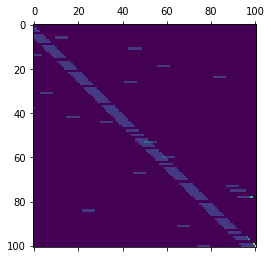

In [13]:
def cl_markov_matrix(max_roll=6, jump_at_end=True):
    """
    Create a Markov transition matrix
    
    If jump_at_end is True, then apply ladder/chute jumps at the end of each turn.
    If False, then apply them at the beginning of the next turn.
    """  
    # Create the basic transition matrix:
    mat = np.zeros((101, 101))
    for i in range(101):
        mat[i + 1:i + 1 + max_roll, i] = 1. / max_roll
        
    # We could alternatively use scipy.linalg.circulent as follows:
    # mat = circulant([0, *np.ones(max_rolls) / 6, *np.zeros(100)])[:101, :101]

    # rolls off the end of the board don't change the state;
    # add these probabilities to the diagonal
    mat[range(101), range(101)] += 1 - mat.sum(0)

    # account for the presence of chutes and ladders
    # we'll do this via  another transition matrix
    cl_mat = np.zeros((101, 101))
    ind = [CHUTES_LADDERS.get(i, i) for i in range(101)]
    cl_mat[ind, range(101)] = 1
    if jump_at_end:
        return cl_mat @ mat
    else:
        return mat @ cl_mat

mat = cl_markov_matrix()
plt.matshow(mat)
plt.grid(False)

In [14]:
def cl_probability(n):
    """Compute the state vector after n turns"""
    mat = cl_markov_matrix()
    v_0 = [1, *np.zeros(100)]
    return np.linalg.matrix_power(mat, n) @ v_0

In [15]:
probs = [cl_probability(i)[-1] for i in range(200)]

In [16]:
turns = np.arange(1, len(probs))
np.dot(np.diff(probs), turns)

39.10646029071448